# Datascience project

## Voorwoord

Jammer genoeg heb ik niet zoveel tijd kunnen steken in deze opgave als ik wou. Dit komt namelijk omdat ik de opdracht niet goed gelezen had en de opgave verkeerd gemaakt heb voor meerendeels van de tijd die ik hierin gestoken heb. Dit project is meegegeven en kan gevonden worden in de notebook "VoorspellenVanSignaalSterkteADVPositie".

## Inlezen van de data

Er wordt begonnen met het inlezen van de data als een array van de lijnen.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
lines = []

if True:
    with open("DataScienceData01.txt","r") as infile:
        lines = infile.readlines()
if True:
    with open("DataScienceData02.txt", "r") as infile:
        lines.extend(infile.readlines())
    

if False:
    with open("DataScienceData03.txt", "r") as infile:
        lines.extend(infile.readlines())

print(lines[1])



Time=12/03 06:08:53& Sender=44:6E:E5:C5:8F:4F& Location=gang@0.61875;0.13758& WifiInfo=ODISEE@88-1d-fc-30-d4-40:-74,campusroam@88-1d-fc-30-d4-43:-74,ODISEE@88-1d-fc-30-d5-50:-72,eduroam@88-1d-fc-30-d4-42:-74,eduroam@88-1d-fc-30-d5-52:-72,campusroam@88-1d-fc-30-d5-53:-73,ODISEEGuest@88-1d-fc-30-d4-41:-75,ODISEEGuest@88-1d-fc-30-d5-51:-73,CiscoC5976@58-6d-8f-19-14-38:-82,rechts@58-6d-8f-19-10-fc:-59,ODISEE@88-1d-fc-41-dc-50:-81,eduroam@88-1d-fc-41-dc-52:-81,campusroam@88-1d-fc-41-dc-53:-67,eduroam@88-1d-fc-2c-c0-02:-78,campusroam@88-1d-fc-2c-c0-03:-71,ODISEE@88-1d-fc-2c-c0-00:-77,telenet-5467D@dc-53-7c-85-46-82:-87,ODISEEGuest@88-1d-fc-41-dc-51:-80,ODISEEGuest@88-1d-fc-2c-c0-01:-73,CiscoC5959@58-6d-8f-19-13-f4:-81,TELENETHOMESPOT@02-53-7c-85-46-83:-86



De lijnen zullen meerdere keren gesplit moeten worden om zo een uiteindelijke dataset te krijgen.
Dit gebeurt door het gebruik van de dataParse functie:

Deze zal de data splitten en parsen naar dictionary objecten. Vorm in json:
```json
[
    {
        sender = '',
        location = '',
        time = '',
        x = '',
        y = '',
        px = '',
        py = '',
        xmax = '',
        ymax = '',
        WifiInfo= [
            {
                ssid = '',
                mac = '',
                routerid = '',
                signal = ''
            },
            ...
        ]
    },
    ...
]
```
Deze worden daarna in een dataframe gestoken.

In [2]:
from datetime import datetime
wifiSignals = []

def dataParse2(l):
    objs = l.split("& ")
    dic = {}
    for obj in objs:
        items = obj.split("=")
        title = items[0]
        data = items[1].split(",")
        if len(data) == 1:
            data = data[0]
        if title == "Time":
            dic[title] = datetime.strptime(data, "%d/%m %H:%M:%S")
            continue
        if title == "Location":
            temp = data.split("@")
            naam = temp[0].lower()
            x, y = temp[1].split(";")
            dic["location"] = naam
            img = plt.imread(naam+'.png')
            height, width, channels = img.shape
            dic["x"] = float(x) * width
            dic["y"] = float(y) * height
            dic["px"] = float(x)
            dic["py"] = float(y)
            dic["xmax"] = width
            dic["ymax"] = height
            continue
        if title == "WifiInfo":
            appendable = []
            for f in data:
                append = {}
                temp = f.replace("\n",'').split('@')
                ti = temp[0]
                append["ssid"] = ti
                temp = temp[1].split(":")
                append["mac"] = temp[0]
                append["routerId"] = "".join(temp[0].split('-'))
                append["routerId"] = append["routerId"][:-4]
                if append["routerId"] not in wifiSignals:
                    wifiSignals.append(append["routerId"])
                append["signal"] = float(temp[1])
                appendable.append(append)
            dic[title] = sorted(appendable, key=lambda k: k["signal"], reverse=True)
            continue
        dic[title] = data
    return dic


data = []
for l in lines:
   data.append(dataParse2(l))




d = pd.DataFrame(data)
print(d.head())

              Sender                Time  \
0  44:6E:E5:C5:8F:4F 1900-03-12 06:08:41   
1  44:6E:E5:C5:8F:4F 1900-03-12 06:08:53   
2  44:6E:E5:C5:8F:4F 1900-03-12 06:09:03   
3  44:6E:E5:C5:8F:4F 1900-03-12 06:09:17   
4  44:6E:E5:C5:8F:4F 1900-03-12 06:09:41   

                                            WifiInfo location       px  \
0  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.65625   
1  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.61875   
2  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.26250   
3  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.63333   
4  [{'ssid': 'rechts', 'mac': '58-6d-8f-19-10-fc'...     gang  0.63958   

        py          x  xmax          y  ymax  
0  0.04449  186.37500   284   49.51737  1113  
1  0.13758  175.72500   284  153.12654  1113  
2  0.13826   74.55000   284  153.88338  1113  
3  0.31006  179.86572   284  345.09678  1113  
4  0.49555  181.64072   284  551.54715  1113  


## Selectie van de data

Nadat de data ingelezen wordt is het een goed idee om het in beeld te brengen zodat we een idee hebben van met wat we gaan werken. Dit wordt gedaan door de meetpunten te displayen in een scatterplot overheen de images. 


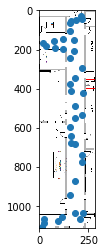

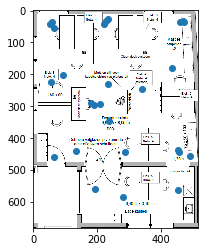

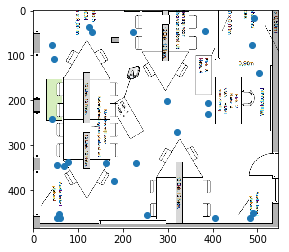

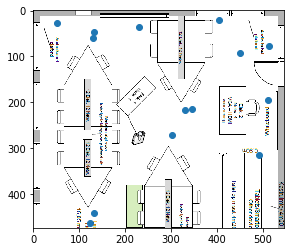

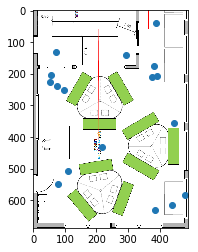

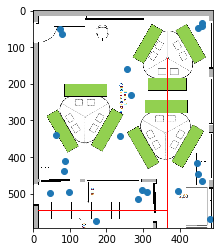

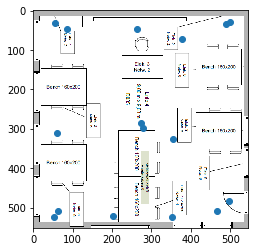

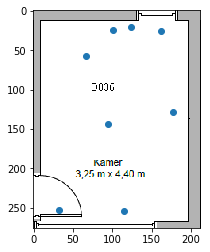

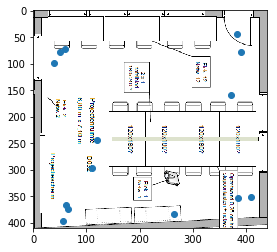

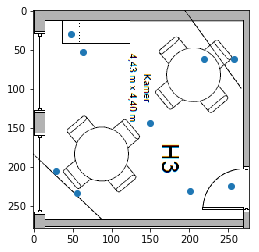

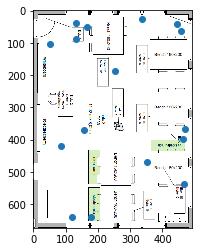

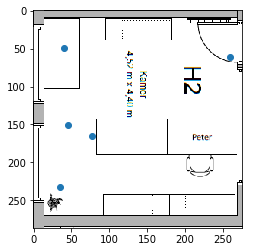

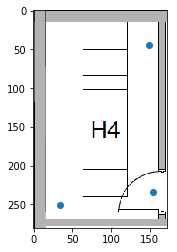

In [3]:
lokalen = d.location.unique().tolist()

for i in lokalen:
    temp = d.loc[d["location"] == i]
    plt.scatter(temp.x, temp.y)
    #print(np.column_stack((temp.x, temp.y)))
    #print(i)
    img = plt.imread(i+'.png')
    #print(img)
    plt.imshow(img)
    plt.show()

Zoals men kan zien zijn er sommige meetpunten die zeer dicht bij elkaar liggen. In dit geval worden deze gefilterd en moesten ze gelijkaardige wifi info hebben eruit gehaald.

In [289]:

def removeIrelevant(df, minSampleSize=50):
    rdf = []
    returnable = pd.DataFrame()
    for i, v in df.iterrows():
        rdf = CloseToOthers(v, rdf)
    rdf = pd.DataFrame(rdf)
    return rdf

def CloseToOthers(i, df, SpacePerc = .1):
    tdf = pd.DataFrame(df)
    approved = []
    if "location" in tdf:
        l = tdf.loc[tdf["location"] == i["location"]]
        for index, dataframe in l.iterrows():
            temp = abs(dataframe.px - i.px) 
            temp2 = abs(dataframe.py - i.py)
            if temp <= SpacePerc and temp2 <= SpacePerc and len(dataframe["WifiInfo"]) > len(i["WifiInfo"]):
                return df
        df.append(i)
        return df
    else:
        df.append(i)
        return df
    

In [290]:
g = removeIrelevant(d)
print("oud: {} \nNieuw: {}".format(len(d), len(g)))

oud: 217 
Nieuw: 203


### Training data:

Nadat de data gefilterd geweest is kan er begonnen worden aan de voorbereiding van de trainings data. Er wordt ook nog een functie aangemaakt voor de modellen te evalueren.

Voor de x waarden gebruikt deze opgave een lijst van de top 2 bereikbare modems.De y waarden werden de coordinaten van het meetpunt + een nummer die afhankelijk is van het lokaal gegeven. Dit nummer werd vermenigvuldigd zodat het niet kan samenspelen met de percentages (float 0-1). Uit testen bleek dit beter te gaan dan 3 verschillende y waarden te proberen predicten. En om dit te parsen haalt men gewoon het tiental (het eerste/eerste twee getallen) van de return values en de overblijvende nummers zijn percentages (tussen 0 en 1 ideaal) die vermenigvuldigd moeten worden met de breedte / lengte van het lokaal.

Daarna werd er geexperimenteerd met bepaalde scalers om het beste resultaat te halen waaruit bleek dat de normalizer de beste test results gaf.

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


def prepTrainingOLD(df, l=7):
    x = []
    y = []
    #scaler = MinMaxScaler(feature_range=(0,1))
    #scaler = StandardScaler()
    #scaler = MaxAbsScaler()
    scaler = Normalizer()
    
    for i, dataframe in df.iterrows():
        tx = []
        for i in sorted(dataframe["WifiInfo"], key=lambda x: x["signal"], reverse=True):
            if i["routerId"] not in tx:
                tx.append(wifiSignals.index(i["routerId"]))
            if len(tx) >= 2:
                break
                
        #for ij in dataframe["WifiInfo"]:
        #    tx[ij["routerId"]] = ij["signal"]
        #print(tx)
        x.append(tx)
        ty = (lokalen.index(dataframe["location"])/len(lokalen),dataframe["px"], dataframe["py"])
        #x.append(tx)
        y.append(ty)
    
    fx = pd.DataFrame(x).fillna(0)
    fy =  pd.DataFrame(y)
    #print(fx)
    #print(fy)
    xtrain, xtest, ytrain, ytest = train_test_split(fx, fy)
    scaler.fit(xtrain)
    xtrain = scaler.transform(xtrain)
    xtest = scaler.transform(xtest)
    return xtrain, xtest, ytrain, ytest


def prepTraining(df, l=7):
    x = []
    y = []
    scaler = Normalizer()
    for i, dataframe in df.iterrows():
        tx = []
        for i in sorted(dataframe["WifiInfo"], key=lambda x: x["signal"], reverse=True):
            if i["routerId"] not in tx:
                tx.append(wifiSignals.index(i["routerId"]))
            if len(tx) >= 2:
                break
        x.append(tx)
        ty = (dataframe["px"]+lokalen.index(dataframe["location"])*10, dataframe["py"]+lokalen.index(dataframe["location"])*10)
        y.append(ty)
    fx = pd.DataFrame(x).fillna(0)
    fy =  pd.DataFrame(y)
    xtrain, xtest, ytrain, ytest = train_test_split(fx, fy, random_state=3)
    scaler.fit(xtrain)
    xtrain = scaler.transform(xtrain)
    xtest = scaler.transform(xtest)
    return xtrain, xtest, ytrain, ytest


def score(mod, cv=3):
    kfold = KFold(n_splits=3, shuffle=True, random_state=2)
    print("Model score {}\nCrosValScore {}\nMean {}\n\n".format(mod.score(xtest, ytest), cross_val_score(mod, xtest, ytest, cv = cv),cross_val_score(mod, xtest, ytest, cv = cv).mean()))
    print("Kfold:\nScore: {}\nMean: {}".format(cross_val_score(mod, xtest, ytest, cv=kfold),cross_val_score(mod, xtest, ytest, cv=kfold).mean()))

## Modellen

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png "Vormen van plotting")


### Lineare regressie

Het eenvoudigste model. Dit komt vooral omdat er niet veel parameters zijn die dit model aanpassen t.o.v. andere modellen die hier gebruikt worden. Het reflecteerd ook dus zeer goed de kwaliteit van de trainings set die gebruikt wordt.

In [312]:
from sklearn.linear_model import LinearRegression


xtrain, xtest, ytrain, ytest = prepTraining(d)



def LinReg():
    lr = LinearRegression().fit(xtrain, ytrain)
    score(lr)
    return lr

model = LinReg()

Model score 0.053549619325076736
CrosValScore [0.08107485 0.05643525 0.26221046]
Mean 0.1332401864126653


Kfold:
Score: [0.25199567 0.00721587 0.08458426]
Mean: 0.11459860042677378


### Gaussian process

Dit was een model waar er meer geexperimenteerd werd in de notebook (eerder vermeld). De mogelijkheid om kernels te kiezen die het model zou gebruiken leek mij zeer interessant om de resultaten hiervan te kunnen zien.


#### White kernel

Op zich zelf is deze kernel redelijk onbruikbaar. Het is een white noise kernel, wat betekend dat het willekeurige en onverwachte resultaten zal geven, maar dit is handig als je ze in gebruik zet met andere kernels om een meer gevarieerd resultaat te geven.


#### DotProduct en RBF kernels

De dotproduct kernel is een kernel die meer decision tree achtige resultaten geeft, terwijl de RBF kernel meer gevarieerd zal zijn. Dit is ook te zien in de notebook waar ze oorspronkelijk geimplementeerd werden, maar het leek interessant om ze in deze opgave ook te implementeren.

Jammer genoeg is het niet gelukt om de White noise die deze kernel genereerd te onderdrukken. (((***Goede***))) resultaten zijn bereikbaar via de RBF en DotProduct kernel op zichzelf, maar van zodra dat de white noise erbij komt is dit teveel. Dit is zichtbaar door de testscores die exact dezelfde zijn als die van de whiteKernel op zichzelf.

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_gpc_xor_001.png "Kernels")




In [389]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel

def GaussProc(alpha=.08, kernel=RBF()):
    gp = GaussianProcessRegressor(kernel=kernel,alpha=alpha).fit(xtrain, ytrain)
    #print("Model score:{}".format(gp.score(xtest, ytest)))
    return gp, gp.score(xtest, ytest)
    

    
lastScore = 0
optimal = 1
kern = RBF()
#for i in np.arange(0.00001,1, .0001):
#    model, sc = GaussProc(alpha=i, kernel=DotProduct())
#    if sc > lastScore:
#        lastScore = sc
#        optimal = i
#        print("Last Score: {}\nOptimal num: {}".format(lastScore, optimal))

optimal = .1


model, dump = GaussProc(alpha=optimal, kernel=WhiteKernel())
score(model)
print("\n\n\n")

model, dump = GaussProc(alpha=optimal, kernel=DotProduct())
score(model)
print("\n\n\n")
optimalRbf = 2
model, dump = GaussProc(alpha=optimalRbf, kernel=RBF())
score(model)

print("\n\n\n")

model, dump = GaussProc(alpha=optimal, kernel=DotProduct() * WhiteKernel(noise_level = 1e-5, noise_level_bounds=(1e-10, 1e+1)))
score(model)
print("\n\n\n")
optimalRbf = 2
model, dump = GaussProc(alpha=optimalRbf, kernel=RBF() * WhiteKernel(noise_level = 1e-5, noise_level_bounds=(1e-10, 1e+1)))
score(model)
#a, b = GaussProc(alpha=0.04908, kernel=DotProduct() * WhiteKernel())
#print(b)

Model score -1.3040243750461273
CrosValScore [-1.80544992 -1.09822479 -1.12201902]
Mean -1.3418979083128233


Kfold:
Score: [-1.59551739 -1.24587679 -1.11763551]
Mean: -1.3196765647323825




Model score 0.05289226283071731
CrosValScore [0.07935586 0.06096812 0.25956421]
Mean 0.13329606013862721




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([76.25]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.46875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 45, 'nit': 3, 'warnflag': 2}
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.46875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 45, 'nit': 3, 'warnflag': 2}
  ConvergenceWarning)


Kfold:
Score: [0.25083644 0.01026288 0.08810267]
Mean: 0.11640066158846989




Model score 0.04847369359864713
CrosValScore [0.04184544 0.12240472 0.30573872]
Mean 0.15666296007411418


Kfold:
Score: [0.23477509 0.06686579 0.10696049]
Mean: 0.13620045723071283




Model score -1.3040243750461273
CrosValScore [-1.80544992 -1.09822479 -1.12201902]
Mean -1.3418979083128233


Kfold:
Score: [-1.59551739 -1.24587679 -1.11763551]
Mean: -1.3196765647323825




Model score -1.3040243750461273
CrosValScore [-1.80544992 -1.09822479 -1.12201902]
Mean -1.3418979083128233


Kfold:
Score: [-1.59551739 -1.24587679 -1.11763551]
Mean: -1.3196765647323825


### Random Forest

Dit model werd gekozen omdat een decision tree beter past bij het voorspellen van welk lokaal een bepaalde value in komt. Door dus de lokalen op hogere waarden te steken (tientallen ipv values tussen 0 en 1) wordt een decision tree nuttiger. Jammer genoeg wordt dit niet gereflecteerd in de resultaten.

Er moest voor deze opgave ook een vorm van decision tree aanwezig zijn, en degene met beste resultaten is voor deze opgave random forest. Door for loops te maken kan er gekeken worden wat de beste waarden zijn voor de n_estimators en max_depth. 

In [294]:
from sklearn.ensemble import RandomForestRegressor


def rfor(est=5, dep=50):
    lr =  RandomForestRegressor(n_estimators=est, max_depth=dep)
    lr.fit(xtrain, ytrain)
    return lr, lr.score(xtest, ytest)
#Calculating optimal depth
lastScore = 0
optimal = 1
for i in np.arange(1,80,.05):
    if i == 1:
        model, lastScore = rfor(dep=i)
        continue
    model, sc = rfor(dep=i)
    if sc > lastScore:
        lastScore = sc
        optimal = i
        print("{} en {}".format(lastScore, optimal))
    break

de = optimal
lastScore = 0
optimal = 1

for i in range(1,80):
    if i == 1:
        model, lastScore = rfor(dep=i)
        continue
    model, sc = rfor(est=i, dep=6.85)
    if sc > lastScore:
        lastScore = sc
        optimal = i
        print("{} en {}".format(lastScore, optimal))

    
optimal, sc = rfor(est=optimal, dep=de)
score(optimal)

0.05731817367540793 en 2
0.08226970663928608 en 4
0.11383447594132909 en 6
0.1356945475227735 en 18
Model score -0.10544783760114482
CrosValScore [0.04500586 0.04377591 0.0086799 ]
Mean 0.11149634984717412


Kfold:
Score: [ 0.2731529  -0.06379346  0.1188839 ]
Mean: 0.12751157073606273


### Neural net

{{}}

In [372]:
from sklearn.neural_network import MLPRegressor


def neuralNet():
    lr = MLPRegressor(hidden_layer_sizes =100, solver="sgd",alpha=20, max_iter=500, momentum=.9)
    lr.fit(xtrain, ytrain)
    return lr

model = neuralNet()
score(model)

Model score -0.020048317987887438
CrosValScore [0.08638929 0.07721733 0.23919267]
Mean 0.13494499844986285


Kfold:
Score: [0.24753026 0.0192626  0.10087002]
Mean: 0.12344449081010432


# Conclusie

Uit deze vindingen kunnen we afleiden dat meeste modellen redelijk gelijkaardige scores halen voor deze trainingsdata. Hoewel theoretisch random forest het beste van de bovenstaande modellen zou zijn krijgt ze een gelijkaardige score t.o.v. de andere modellen.

## Post-mortem/wat kon beter

Er moest zeker meer tijd gestoken worden in het selecteren van de trainings data en features. Deze hebben de rest van het project sterk beinvloed en gezorgd voor lage en gelijkaardige scores.